# Clustering My Most Played Spotify Songs

This notebook will be for creating a clustering model for my most played Spotify songs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('SongDataForModel.csv')

In [3]:
df.head()

,Song Info,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo,Play Count
0,"Bedrock Anthem by ""Weird Al"" Yankovic",0.700,0.913,-8.156,0.1510,0.05910,0.154,0.653,93.037,31
1,"Canadian Idiot (Parody of ""American Idiot"" by ...",0.543,0.697,-9.211,0.0612,0.00206,0.343,0.861,185.978,12
2,"Hardware Store by ""Weird Al"" Yankovic",0.707,0.867,-12.443,0.0703,0.18500,0.329,0.684,126.138,10
3,155 by +44,0.462,0.936,-3.604,0.0429,0.00173,0.373,0.546,155.017,25
4,Chapter 13 by +44,0.419,0.811,-4.033,0.0325,0.00117,0.070,0.192,144.085,28


### Model Creation

In [4]:
play_counts = df['Play Count']

features_for_cluster = df.columns.drop(['Song Info', 'Play Count'])

X = df[features_for_cluster]

In [5]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.700,0.913,-8.156,0.1510,0.05910,0.154,0.653,93.037
1,0.543,0.697,-9.211,0.0612,0.00206,0.343,0.861,185.978
2,0.707,0.867,-12.443,0.0703,0.18500,0.329,0.684,126.138
3,0.462,0.936,-3.604,0.0429,0.00173,0.373,0.546,155.017
4,0.419,0.811,-4.033,0.0325,0.00117,0.070,0.192,144.085


In [6]:
scaler = StandardScaler()

pd.DataFrame(scaler.fit_transform(X))

,0,1,2,3,4,5,6,7
0,2.140841,0.193090,-1.077193,1.548538,1.093726,-0.442134,0.760411,-1.353259
1,0.785648,-1.719740,-1.500658,-0.368791,-0.365615,0.710966,1.784341,1.773610
2,2.201264,-0.214272,-2.797945,-0.174496,4.314815,0.625551,0.913016,-0.239622
3,0.086472,0.396771,0.749926,-0.759517,-0.374058,0.893998,0.233677,0.731971
4,-0.284695,-0.710191,0.577731,-0.981568,-0.388385,-0.954623,-1.508974,0.364179
...,...,...,...,...,...,...,...,...
442,0.354058,0.883834,1.032102,-0.037849,-0.407676,0.869593,-0.937936,-1.034957
443,-1.070189,0.733287,1.047355,1.932858,-0.386850,0.448620,-0.809944,2.050160
444,-0.707653,0.804133,1.122013,0.173527,-0.416863,0.082557,0.853943,1.607713
445,0.604380,0.706720,1.001597,0.107338,-0.331587,0.540136,1.016393,-1.168589


In [7]:
preprocessing = ColumnTransformer([
    ('scaler', scaler, X.columns),
])

<AxesSubplot:>

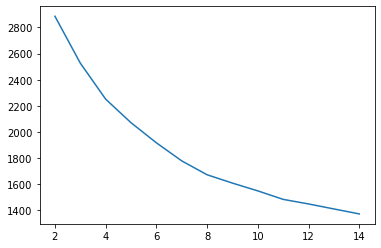

In [27]:
ssd = []
N = 15

for i in range(2, N):
    kmeans_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('kmeans', KMeans(n_clusters=i))
    ])
    
    clusters = kmeans_pipeline.fit_predict(X)
    
    inertia = kmeans_pipeline[1].inertia_
    
    ssd.append(inertia)

ssd_series = pd.Series(data=ssd, index=range(2, len(ssd)+2))

sns.lineplot(data=ssd_series, x=ssd_series.index, y=ssd_series.values)    

There is no definite elbow point here. To refrain from going too high, I will choose k=6.

In [35]:
k=6

kmeans_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('kmeans', KMeans(n_clusters=k))
])

clusters = kmeans_pipeline.fit_predict(X)

cluster_centers = kmeans_pipeline[1].cluster_centers_

In [36]:
pd.Series(clusters).value_counts()

2    124
3    120
0     96
1     60
4     26
5     21
dtype: int64

In [37]:
df_clust = df.copy()

df_clust['Cluster'] = clusters

In [38]:
df_clust[['Song Info', 'Cluster']]

,Song Info,Cluster
0,"Bedrock Anthem by ""Weird Al"" Yankovic",3
1,"Canadian Idiot (Parody of ""American Idiot"" by ...",1
2,"Hardware Store by ""Weird Al"" Yankovic",5
3,155 by +44,3
4,Chapter 13 by +44,2
...,...,...
442,Sirens by zebrahead,2
443,The Perfect Crime by zebrahead,0
444,Wasted Generation by zebrahead,0
445,We're Not Alright by zebrahead,3


In [32]:
centers_orig_scale = kmeans_pipeline[0].transformers_[0][1].inverse_transform(cluster_centers)

pd.DataFrame(data=centers_orig_scale, columns=X.columns)

,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.344326,0.948244,-4.394977,0.132003,0.005801,0.292951,0.420091,169.381860
1,0.436268,0.918677,-4.802165,0.076019,0.006784,0.194471,0.326312,114.020480
2,0.461418,0.699845,-9.347493,0.044346,0.022015,0.209839,0.560896,130.664836
3,0.507541,0.933142,-4.685973,0.069217,0.007798,0.216193,0.634223,130.560959
4,0.578263,0.797316,-7.288579,0.045016,0.174684,0.278111,0.727842,128.546474


In [33]:
from joblib import dump

In [34]:
dump(kmeans_pipeline, 'KMeansModel.joblib') # save the model

['KMeansModel.joblib']